### Importing data 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('\\Collaborative-Projects\\cleaned_ranking_2.csv')
print(df.shape)
df.head(3)

(273898, 16)


,Unnamed: 0,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
0,0,AL,Hale County,1.0,65.0,Premature Death,1.0,271.0,NaN,12228.624,10218.083,14239.165,2010.0,1065.0,2004.0,2006.0
1,1,AL,Hale County,1.0,65.0,Premature Death,1.0,278.0,NaN,11626.723,9767.516,13485.930,2011.0,1065.0,2005.0,2007.0
2,2,AL,Hale County,1.0,65.0,Premature Death,1.0,286.0,NaN,13522.955,11397.331,15648.579,2012.0,1065.0,2006.0,2008.0


In [21]:
df = df.rename(columns = {'Unnamed: 0':'index'})
df.isnull().sum().sort_values()

index                             0
state                             0
county                            0
state_code                        0
county_code                       0
measure_name                      0
measure_id                        0
raw_value                         0
fips_code                         0
start_year                        0
numerator                     77142
denominator                   96440
confidence_interval_lower    100473
confidence_interval_upper    100473
data_release_year            137092
end_year                     205729
dtype: int64

In [22]:
df.describe()

,index,state_code,county_code,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
count,273898.000000,273898.000000,273898.000000,273898.000000,1.967560e+05,1.774580e+05,273898.000000,173425.000000,173425.000000,136806.000000,273898.000000,273898.000000,68169.000000
mean,145256.319648,30.363387,101.741838,38.637150,7.729614e+03,8.580908e+04,1138.570435,1472.117955,2021.006987,2012.212571,30465.128939,2006.691119,2005.857208
std,84510.326002,15.156523,108.012610,37.451676,7.387473e+04,6.775931e+05,2921.284656,3002.299155,4136.840807,1.288271,15174.872861,3.153091,3.160812
min,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+01,0.000000,0.000000,0.000000,2010.000000,1000.000000,1997.000000,1999.000000
25%,70636.250000,19.000000,33.000000,7.000000,2.050000e+02,2.056000e+03,0.219000,0.200000,0.300000,2011.000000,19000.000000,2005.000000,2004.000000
50%,143368.500000,29.000000,77.000000,24.000000,7.613200e+02,8.155000e+03,0.694000,0.380000,0.470000,2012.000000,29179.000000,2007.000000,2006.000000
75%,218518.750000,45.000000,133.000000,50.000000,2.512812e+03,2.735908e+04,107.000000,75.000000,94.000000,2013.000000,45079.000000,2009.000000,2008.000000
max,296977.000000,72.000000,840.000000,125.000000,6.829725e+06,3.769191e+07,32810.400000,23917.100000,46148.300000,2014.000000,72153.000000,2012.000000,2011.000000


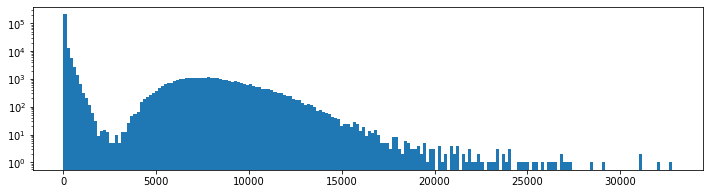

In [117]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df.raw_value, bins=200)

ax.set_yscale('log')

In [143]:

df1.head()

,state,index,state_code,county_code,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
0,AK,112525.615385,2.0,147.578307,29.536801,2264.548275,23845.850005,1548.142943,1658.959760,2589.626767,2012.097955,2147.578307,2006.638074,2005.535980
1,AL,150852.201603,1.0,66.037915,38.263404,6434.582686,60540.125959,1507.593773,2001.911959,2551.716180,2012.207914,1066.037915,2006.639719,2005.805485
2,AR,130280.253515,5.0,73.973545,38.413908,3640.168903,34124.412839,1451.283522,1861.930351,2558.896901,2012.220303,5073.973545,2006.666062,2005.805125
3,AZ,132980.856540,4.0,13.007032,38.238397,31231.301431,332859.854344,1248.706871,1730.470081,2057.923003,2012.193230,4013.007032,2006.620956,2005.811518
4,CA,134595.283254,6.0,57.368230,38.436938,48681.407228,529973.319846,973.046305,1323.970289,1574.302245,2012.189748,6057.368230,2006.633301,2005.863053


The raw value column has very complex distribution, mainly distributed around two centers, one near zero, the other near 7500.  

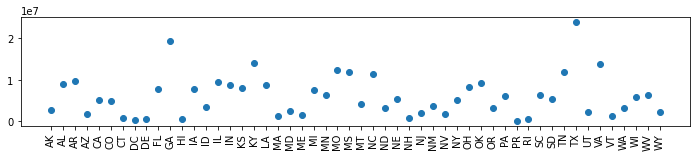

In [165]:
df1 = df.groupby(by='state',as_index = False).sum()
plt.figure(figsize=(12,2))
plt.scatter(df1.state, df1.raw_value)
plt.xticks(rotation=90)
plt.show()

In [168]:
# topfive states with the higest raw_value

df1.sort_values(by='raw_value', ascending=False).head()

,state,index,state_code,county_code,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
44,TX,3386046981,1039008.0,5473248.0,849670.0,1.447972e+08,1.215238e+09,2.391698e+07,1.917774e+07,2.727514e+07,21842510.0,1.044481e+09,43437491.0,10657836.0
10,GA,1835414415,179244.0,2206262.0,530890.0,5.319623e+07,4.775546e+08,1.939744e+07,1.578829e+07,2.176665e+07,13825959.0,1.814503e+08,27668104.0,6865849.0
17,KY,1444279322,219576.0,1241510.0,401905.0,2.548456e+07,2.173946e+08,1.406401e+07,1.157485e+07,1.617813e+07,10465568.0,2.208175e+08,20981763.0,5219005.0
46,VA,1851847097,600270.0,3096581.0,452896.0,3.366323e+07,4.013775e+08,1.391340e+07,1.124627e+07,1.578450e+07,11799591.0,6.033666e+08,23618222.0,6117774.0
24,MO,1448348663,292030.0,1173190.0,387903.0,3.109266e+07,3.065352e+08,1.231022e+07,9.884926e+06,1.413803e+07,10115415.0,2.932032e+08,20207232.0,5102870.0


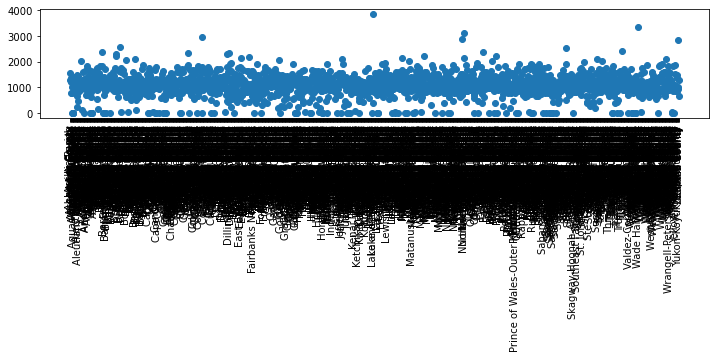

In [160]:
df1 = df.groupby(by='county',as_index = False).mean()
plt.figure(figsize=(12,2))
plt.scatter(df1.county, df1.raw_value)
plt.xticks(rotation=90)
plt.show()

In [164]:
# topfive counties with the higest raw_value

df1.sort_values(by='raw_value', ascending=False).head()

,county,index,state_code,county_code,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
997,Lake and Peninsula Borough,99778.924528,2.0,164.0,30.830189,115.698113,915.692849,3861.141271,3684.284281,7657.044669,2011.961538,2164.0,2006.452830,2004.666667
1871,Wade Hampton Census Area,100871.155172,2.0,270.0,28.396552,611.594821,3367.808172,3348.844467,3410.506507,5375.103912,2011.925926,2270.0,2006.155172,2004.714286
1298,Northwest Arctic Borough,100818.086207,2.0,188.0,28.396552,480.237500,3507.675540,3102.836473,3158.412408,4960.581044,2011.925926,2188.0,2006.155172,2004.714286
435,Corson County,149703.305882,46.0,31.0,39.011765,280.180899,1813.063003,2967.283601,3572.415183,5870.121204,2012.214286,46031.0,2006.658824,2005.809524
1289,Nome Census Area,102113.347826,2.0,180.0,27.391304,626.246429,3456.268139,2868.311692,2853.775540,4184.664097,2012.142857,2180.0,2006.666667,2004.714286


In [ ]:
Four out of the top five counties are in Alaska (state_code=2)

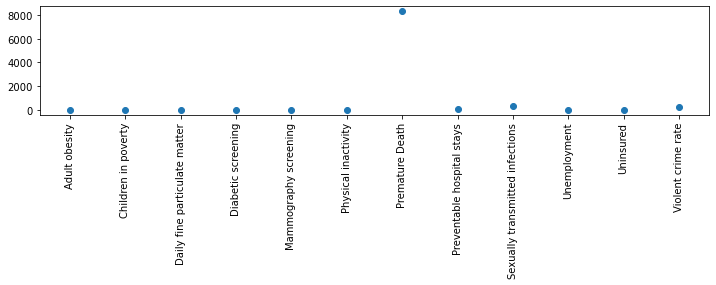

In [169]:
df1 = df.groupby(by='measure_name',as_index = False).mean()
plt.figure(figsize=(12,2))
plt.scatter(df1.measure_name, df1.raw_value)
plt.xticks(rotation=90)
plt.show()

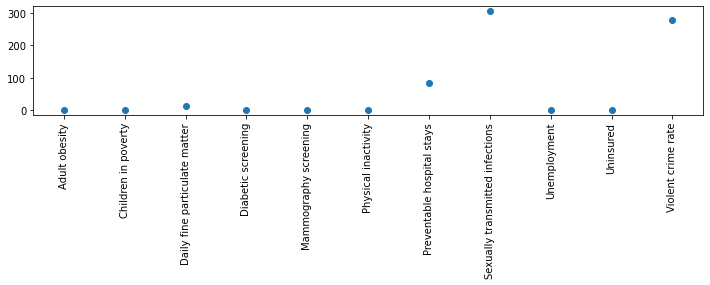

In [155]:
df2 = df1[df1.measure_name != 'Premature Death']
plt.figure(figsize=(12,2))
plt.scatter(df2.measure_name, df2.raw_value)
plt.xticks(rotation=90)
plt.show()

In [170]:
# topfive measures with the higest raw_value

df1.sort_values(by='raw_value', ascending=False).head()

,measure_name,index,state_code,county_code,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
6,Premature Death,21916.425105,30.139862,101.822177,1.0,2104.127828,NaN,8302.923465,7038.811485,9669.899319,2011.499800,30241.684644,2002.594804,2004.594804
8,Sexually transmitted infections,173396.179835,30.252407,102.201582,45.0,796.931637,195415.929926,305.031487,NaN,NaN,2011.981634,30354.608954,2008.981634,NaN
11,Violent crime rate,266054.415138,30.922604,102.731359,43.0,904.336831,196609.149164,278.850355,NaN,NaN,2012.025761,31025.335302,2006.037771,2008.037771
7,Preventable hospital stays,181431.266457,30.262181,100.821622,5.0,NaN,27627.991988,83.060311,73.682589,92.419367,2012.483189,30363.002220,2007.790873,2005.996819
2,Daily fine particulate matter,240055.066786,30.576362,101.892269,125.0,NaN,NaN,11.898329,NaN,NaN,2013.500000,30678.254753,2007.000000,NaN
